In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def calculate_profit(ticker , from_date , to_date):
    filename = ('stocks/{0}.csv').format(ticker)
    data = pd.read_csv(filename)
    data = data.loc[ (data['Date'] >= from_date) & (data['Date'] <= to_date)]
    change_Percent  =  (data.iloc[-1]['Adj Close'] -  data.iloc[0]['Adj Close']) * 100 /  data.iloc[0]['Adj Close']
    print(ticker, np.round(change_Percent,3))
    

In [3]:
df = pd.read_csv('stocks/total_data_price_Symbol.csv', index_col='Symbol')
df.head()

,2019-02-07,2019-02-08,2019-02-11,2019-02-12,2019-02-13,2019-02-14,2019-02-15,2019-02-19,2019-02-20,2019-02-21,...,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
Symbol,,,,,,,,,,,,,,,,,,,,,
A,75.145678,74.977549,74.905022,75.478650,75.956675,76.266566,76.672066,76.761075,77.268776,77.133611,...,83.646706,83.553805,83.573713,83.985128,84.592298,84.854411,84.940674,84.993759,84.920527,84.933851
AAL,36.135525,35.829624,35.773708,35.635560,35.704636,35.546753,35.316507,35.073104,34.727735,34.704711,...,27.790633,27.963329,28.172555,28.424956,28.856693,29.065921,29.275147,28.989536,28.697282,28.368497
AAP,159.906713,160.222005,162.847234,164.427007,165.771154,166.969269,167.666239,167.891917,166.982544,164.101756,...,155.066177,156.003169,157.013077,157.079549,157.744339,159.103836,159.486094,158.947617,158.465642,158.761475
AAPL,169.694194,168.701197,167.367009,167.590144,167.514664,167.964223,167.810003,168.056107,168.459712,168.669718,...,277.063985,278.586243,278.639313,278.317607,279.730418,281.139913,284.612254,286.535797,288.940236,290.180583
ABBV,72.803335,72.797213,73.008336,73.240878,73.583570,73.813049,74.094543,74.011930,73.849765,73.207219,...,86.636609,87.119456,86.905579,86.649572,86.947703,87.297684,87.472677,87.132416,86.701421,86.283389


In [4]:
symbols = df.index.to_numpy()
data = df.to_numpy()


In [5]:
# define normalizer
normalizer = Normalizer()

# create a K-means model with 20 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000 , n_init = 30)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [6]:
pipeline.fit(data)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=1000, n_clusters=10, n_init=30, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [7]:
# predict cluster labels
labels = pipeline.predict(data)

# create a DataFrame aligning labels & companies
df_result = pd.DataFrame({'Cluster': labels, 'Symbol': symbols})

# display df sorted by cluster labels
df_result.sort_values('Cluster')

,Cluster,Symbol
311,0,MRO
446,0,ULTA
308,0,MOS
205,0,HAL
320,0,MYL
...,...,...
260,9,KIM
410,9,SPGI
235,9,INFO
437,9,TTWO


In [19]:
cls = 8
symbols =  df_result[df_result['Cluster'] == cls]['Symbol'].tolist()
print(cls, symbols)

8 ['ADSK', 'ALGN', 'AMCR', 'BEN', 'CNP', 'COTY', 'CSCO', 'CSX', 'ETFC', 'EXC', 'FANG', 'FLS', 'FTV', 'HST', 'IFF', 'ILMN', 'IT', 'IVZ', 'JNPR', 'LNC', 'MHK', 'MO', 'MTD', 'NFLX', 'NSC', 'PFE', 'PKI', 'PRU', 'PXD', 'SEE', 'SJM', 'TXT', 'UA', 'UAA', 'VAR', 'WMB', 'WYNN', 'XOM']


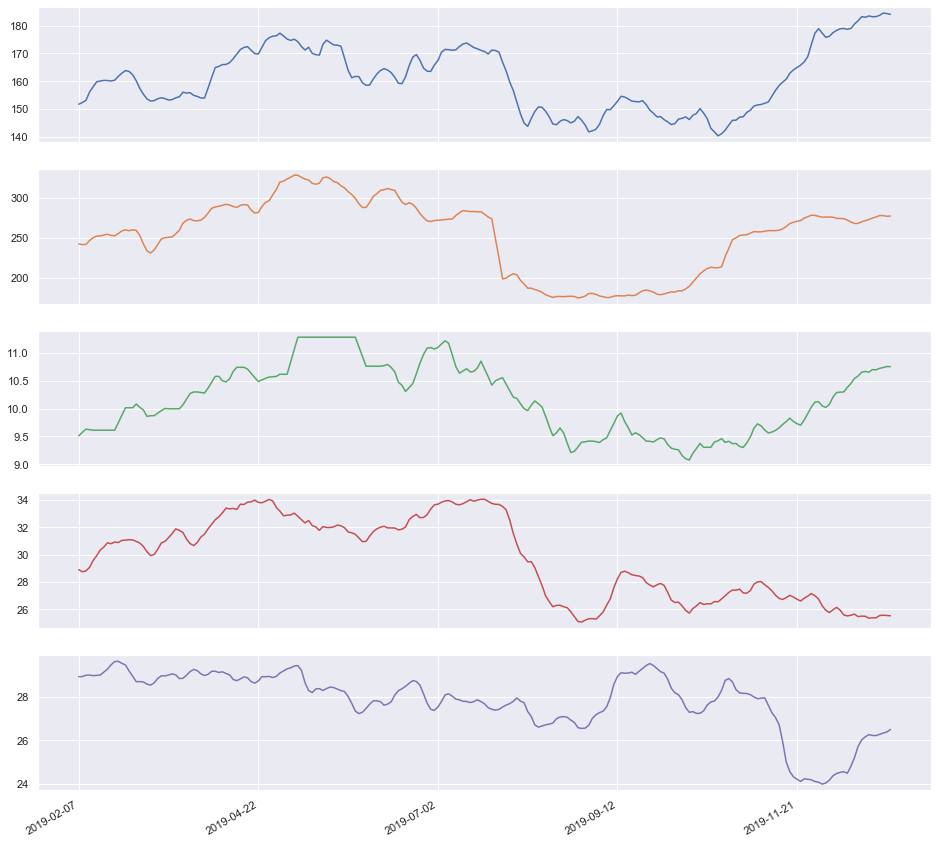

In [22]:
sns.set(rc={'figure.figsize':(16, 16)})
cluster_Symbol = pd.DataFrame()
for s in symbols[:5]: 
    cluster_Symbol[s] = df.loc[s]
    
cluster_Symbol.plot(subplots=True, legend=False)
plt.show()

In [20]:
for s in symbols: 
    calculate_profit(s , '2019-01-01' , '2019-12-31')

ADSK 42.261
ALGN 38.057
AMCR 23.082
BEN -9.864
CNP 1.439
COTY 69.129
CSCO 14.82
CSX 18.4
ETFC 3.31
EXC 6.713
FANG -1.754
FLS 33.068
FTV 13.849
HST 17.378
IFF -1.922
ILMN 12.638
IT 22.447
IVZ 14.231
JNPR -5.589
LNC 17.45
MHK 14.992
MO 8.045
MTD 45.279
NFLX 20.888
NSC 32.389
PFE -6.047
PKI 26.634
PRU 18.477
PXD 13.675
SEE 14.534
SJM 14.418
TXT -3.074
UA 16.596
UAA 21.28
VAR 26.041
WMB 12.295
WYNN 37.37
XOM 4.925
